In [1]:
import torch #torch 패키지에는 다차원 데이터구조 즉 Tensor가 포함되어있고, 텐서에 대해 연산을 하는 다양한 함수가 포함되어있음.
import torchvision #torchvision 패키지에는 데이터 셋, 이미지 리사이즈, 이미지 텐서 변환, 이미지 정규화등을 할 수 있고, VGGnet과 같은 이미지 분류 모델도 포함하고있음 
#torchvision.dataset.데이터명(),torchvision.model.VGG등 
import torchvision.transforms as transforms #이미지 크기를 맞춰주거나 텐서로 변환 정규화등을 실행
import torch.nn as nn #deep learning model에 필요한 모듈이 모아져있는 패키지, 신경망을 구축하기 위한 데이터 구조나 레이어 정의
#ex) ReLU와 같은 활성화함수, nn.CrossEntropyLoss()와 같은 손실함수가 포함되어있음
import torch.nn.functional as F #nn과 같은 모듈이 모아져 있음, functional은 함수, nn은 클래스임
#torch.nn은 인스턴트화를 시켜야함->저장하여 활용이 가능하다
#torch.nn.functional은 인스턴트화 시켜줄 필요없이 버로 입력값을 받아 수행가능함
import torch.optim as optim #학습에 관련된 optimizing method가 있는 패키지
#torch.optim 다양한 최적화 알고리즘을 구현하는 패키지이다. 확률적 경사하강법을 중심으로한 파라미터 최적화 알고리즘 구현
import matplotlib.pyplot as plt #시각화 패키지
import numpy as np #메트릭스, 백터, 배열등 계산.

In [2]:
torch.manual_seed(42)

In [3]:
#데이터 전처리 Part

transform=transforms.Compose(
    [transforms.ToTensor(), #이미지 Tensor 변환
     transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5)), #color image-> 3 channel에 대해서 각각 평균과 표준편차로 나누어줌
     transforms.Resize(224) #96 이미지 사이즈->224 size로 변경
    ])

In [4]:
# Load Dataset

trainset = torchvision.datasets.STL10(root='./data', split='train', download=True, transform=transform) 
#trainset을 불러올때, transpose 시켜준다->텐서로 변환 및 정규화->이미지데이터 변환하는것
#torchvision이 제공하는 데이터셋 가져오기(저장하기)

Files already downloaded and verified


In [5]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=32, shuffle=True, num_workers=2) #데이터가져오기

In [6]:
testset = torchvision.datasets.STL10(root='./data', split='test', download=True, transform=transform)

Files already downloaded and verified


In [7]:
print(trainset.classes)

['airplane', 'bird', 'car', 'cat', 'deer', 'dog', 'horse', 'monkey', 'ship', 'truck']


In [8]:
testloader = torch.utils.data.DataLoader(testset, batch_size=32, shuffle=False, num_workers=2) 

In [9]:
classes=['airplane', 'bird', 'car', 'cat', 'deer', 'dog', 'horse', 'monkey', 'ship', 'truck']

In [10]:
#이미지를 보여주기 위한 함수
def imshow(img) :
  img = img/2+0.5 #unnormalize
  npimg = img.numpy()
  plt.imshow(np.transpose(npimg, (1, 2, 0)))
  plt.show()

In [11]:

dataiter = iter(trainloader) #iter(호출가능한객체, 반복을 끝낼값), iter()을 적용햐쥬는 이유 optimizer를 구성하려면 최적화할 매개변수를 포함하는 iterable을 제공해야해서 iter()을 적용하여 iterator데이터 타입으로 생성
images, labels = dataiter.next()
#iter() 함수로 trainloader에 들어있는 이미지와 라벨을 꺼낼 수 있는 객체를 생성함
#next() 함수로 이미지와 데이터 라벨을 꺼내옴

In [12]:
print(images) #16개 이미지에 대한 Tensor값
print(labels) #16개의 이미지에 대한 label값

tensor([[[[-0.1686, -0.1664, -0.1597,  ..., -0.0868, -0.0835, -0.0824],
          [-0.1686, -0.1664, -0.1597,  ..., -0.0873, -0.0844, -0.0835],
          [-0.1686, -0.1664, -0.1597,  ..., -0.0888, -0.0873, -0.0868],
          ...,
          [-0.0891, -0.0886, -0.0872,  ...,  0.0162,  0.0129,  0.0118],
          [-0.0958, -0.0948, -0.0920,  ...,  0.0162,  0.0129,  0.0118],
          [-0.0980, -0.0969, -0.0936,  ...,  0.0162,  0.0129,  0.0118]],

         [[ 0.0902,  0.0913,  0.0947,  ...,  0.1843,  0.1843,  0.1843],
          [ 0.0913,  0.0923,  0.0952,  ...,  0.1850,  0.1845,  0.1843],
          [ 0.0947,  0.0952,  0.0966,  ...,  0.1869,  0.1850,  0.1843],
          ...,
          [ 0.1888,  0.1886,  0.1882,  ...,  0.2922,  0.2903,  0.2896],
          [ 0.1854,  0.1862,  0.1886,  ...,  0.2936,  0.2932,  0.2930],
          [ 0.1843,  0.1854,  0.1888,  ...,  0.2941,  0.2941,  0.2941]],

         [[ 0.3961,  0.3961,  0.3961,  ...,  0.4543,  0.4577,  0.4588],
          [ 0.3961,  0.3961,  

In [13]:
print(images.size()) #resize를 통해 224size로 바뀐값 확인
print(labels.size()) #16개의 label값

torch.Size([32, 3, 224, 224])
torch.Size([32])


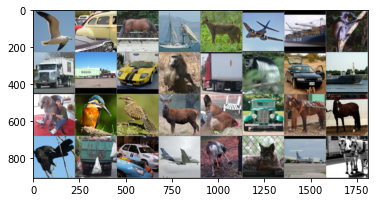

GroundTruth:   bird   car horse  ship   cat airplane  ship monkey truck truck   car monkey truck monkey   car  ship   dog  bird  bird  deer  bird   car horse horse  bird truck   car airplane  deer   cat airplane horse


In [14]:
imshow(torchvision.utils.make_grid(images)) #여러 이미지를 한 번에 출력
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(32))) #이미지와 실제 라벨값 추출

In [15]:
##################train test class별 개수 구하기

train_class_count=dict()


for train_item in trainset: #이미지 텐서값 라벨값 반환
    label=trainset.classes[train_item[1]] #차례대로 첫번째부터 라벨값 추출
    if label not in train_class_count: 
        train_class_count[label] =1 #첫번쨰로 라벨이 나오면 1로 주고 그다음부터 +1씩
    else:
        train_class_count[label] +=1
        
train_class_count

{'bird': 500,
 'dog': 500,
 'horse': 500,
 'cat': 500,
 'truck': 500,
 'monkey': 500,
 'deer': 500,
 'ship': 500,
 'airplane': 500,
 'car': 500}

In [16]:
##################train test class별 개수 구하기

test_class_count=dict()


for test_item in testset: #이미지 텐서값 라벨값 반환
    label=testset.classes[test_item[1]] #차례대로 첫번째부터 라벨값 추출
    if label not in test_class_count: 
        test_class_count[label] =1 #첫번쨰로 라벨이 나오면 1로 주고 그다음부터 +1씩
    else:
        test_class_count[label] +=1
        
test_class_count

{'horse': 800,
 'monkey': 800,
 'dog': 800,
 'airplane': 800,
 'cat': 800,
 'bird': 800,
 'deer': 800,
 'truck': 800,
 'car': 800,
 'ship': 800}

In [17]:
###Bulit Model

In [18]:
######Stem layer 구현(Max pooling 부분 제외)

# Convolution block 

class ConvBlock(nn.Module):
    def __init__(self,in_channels,out_channels,kernel_size,**kwargs):
        super(ConvBlock,self).__init__()
        self.conv=nn.Conv2d(in_channels, out_channels, kernel_size, **kwargs)
        self.batch=nn.BatchNorm2d(out_channels)
        self.relu=nn.ReLU()
        
    def forward(self,x):
        return self.relu(self.batch(self.conv(x)))
    
# convolution layer->batch normalization->activation function 까지 한번에 수행해주는 Module

In [19]:
##### Inception Block

class Inception_block(nn.Module): #Inception module with dimension reductions 정의
    def __init__(self,input_channel, num_1x1, num_3x3_red, num_3x3, num_5x5_red, num_5x5, num_pool_proj): #Inception block의 in channels은 모두 동일하게 들어감.
        super(Inception_block,self).__init__()
        
        #1x1 Convolution
        self.conv_1_1=ConvBlock(input_channel,num_1x1,kernel_size=1)
        
        #3x3 reduce->3x3 Convolution
        self.conv_3_3_r=ConvBlock(input_channel,num_3x3_red,kernel_size=1)
        self.conv_3_3=ConvBlock(num_3x3_red,num_3x3,kernel_size=3,padding=1)
        
        #5x5 reduce->5x5 convolution
        self.conv_5_5_r=ConvBlock(input_channel,num_5x5_red,kernel_size=1)
        self.conv_5_5=ConvBlock(num_5x5_red,num_5x5,kernel_size=5,padding=2)
        
        #3x3 Maxpooling->1x1 Convolution
        self.maxpool=nn.MaxPool2d(kernel_size=3, stride=1, padding=1)
        self.conv1_1=ConvBlock(input_channel,num_pool_proj,kernel_size=1)
        
    def forward(self,x): #Inception module with dimension implement
        #1x1 Convolution
        x_1=self.conv_1_1(x)
        
        #3x3 reduce->3x3 Convolution
        x_2=self.conv_3_3_r(x)
        x_2=self.conv_3_3(x_2)
        
        #5x5 reduce->5x5 convolution
        x_3=self.conv_5_5_r(x)
        x_3=self.conv_5_5(x_3)
        
        #3x3 Maxpooling->1x1 Convolution
        x_4=self.maxpool(x)
        x_4=self.conv1_1(x_4)
        
        #concatenation
        
        x = torch.cat([x_1, x_2, x_3, x_4], 1)
        return x

In [20]:
###전체적인 모델 구현

class GoogleNet(nn.Module):
    def __init__(self):
        super(GoogleNet,self).__init__()
        self.num_classes=10
        #stem layer
        self.layer1=ConvBlock(in_channels=3, out_channels=64,kernel_size=7,stride=2,padding=3) #conv->batchnorm->relu
        self.layer2=ConvBlock(in_channels=64, out_channels=192,kernel_size=3,stride=1,padding=1)
        
        ###pooling layer define
        self.maxpool=nn.MaxPool2d(kernel_size=3,stride=2,padding=1) #stem layer, Inception layer에서 사용
        self.avgpool=nn.AvgPool2d(kernel_size=7,stride=1)
        
        #drop out, linear layer define
        self.dropout=nn.Dropout(0.4)
        self.linear=nn.Linear(1024,10) #최종10개로 분류
        
        
        ###Inception Block define
        self.layer_3a=Inception_block(192,64,96,128,16,32,32) #output channel=64+128+32+32=256
        self.layer_3b=Inception_block(256,128,128,192,32,96,64) #output channel=128+192+96+64=480
        self.layer_4a=Inception_block(480,192,96,208,16,48,64) #output channel=192+208+48+64=512
        self.layer_4b=Inception_block(512,160,112,224,24,64,64) #output channel=160+224+128=512
        self.layer_4c=Inception_block(512,128,128,256,24,64,64) #output channel=128+256+128=512
        self.layer_4d=Inception_block(512,112,144,288,32,64,64) #output channel=112+288+128=528
        self.layer_4e=Inception_block(528,256,160,320,32,128,128) #output channel=256+320+256=832
        self.layer_5a=Inception_block(832,256,160,320,32,128,128) #output channel=256+320+256=832
        self.layer_5b=Inception_block(832,384,192,384,48,128,128) #output channel=384=384+128+128=1024
        
    def forward(self,x):
        #stem layer 실행
        x=self.layer1(x)
        x=self.maxpool(x)
        x=self.layer2(x)
        x=self.maxpool(x)
        
        #inception block
        x=self.layer_3a(x)
        x=self.layer_3b(x)
        x=self.maxpool(x)
        
        x=self.layer_4a(x)
        x=self.layer_4b(x)
        x=self.layer_4c(x)
        x=self.layer_4d(x)
        x=self.layer_4e(x)
        x=self.maxpool(x)
        
        x=self.layer_5a(x)
        x=self.layer_5b(x)
        x=self.avgpool(x)
        x = x.reshape(x.shape[0], -1)
        x=self.dropout(x)
        x=self.linear(x)
        return x
        

In [21]:
# device 설정
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Googlenet 클래스를 인스턴스화
model = GoogleNet().to(device)

# 손실함수 및 최적화함수 설정
loss_func = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0002)

In [24]:
num_epoch=1

loss_arr = []
for i in range(num_epoch):
    print(f'Epoch {i+1}\n-----------')
    for j,[image,label] in enumerate(trainloader):
        x = image.to(device)
        y_= label.to(device)
        
        optimizer.zero_grad()
        output = model.forward(x)
        loss = loss_func(output,y_)
        print(loss)
        loss.backward()
        optimizer.step()
        loss_ave=loss



Epoch 1
-----------
tensor(2.3159, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(2.1663, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(2.2435, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(2.2712, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(2.2639, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.9575, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(2.3307, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(2.1379, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(2.1226, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(2.1245, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.8358, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(2.1538, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(2.2140, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.8366, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(2.1762, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.9164, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.8060, devic

In [27]:
# 맞은 개수, 전체 개수를 저장할 변수를 지정합니다.
correct = 0
total = 0

model.eval()

# 인퍼런스 모드를 위해 no_grad 해줍니다.
with torch.no_grad():
    # 테스트로더에서 이미지와 정답을 불러옵니다.
    for image,label in testloader:
        
        # 두 데이터 모두 장치에 올립니다.
        x = image.to(device)
        y= label.to(device)

        # 모델에 데이터를 넣고 결과값을 얻습니다.
        output = model.forward(x)
        _,output_index = torch.max(output,1)

        
        # 전체 개수 += 라벨의 개수
        total += label.size(0)
        correct += (output_index == y).sum().float()
    
    # 정확도 도출
    print("Accuracy of Test Data: {}%".format(100*correct/total))

Accuracy of Test Data: 44.32500076293945%
